# 

In [1]:
import os 
import warnings 
warnings.simplefilter('ignore')


In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt 
%matplotlib inline

In [4]:
pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


In [5]:
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.color import rgb2gray

#  b1 setting working directories

In [6]:
maddy=os.listdir("C:/Users/aedpu/OneDrive/Documents/keeri3rd/actors/maddy")

In [7]:
karthi=os.listdir("C:/Users/aedpu/OneDrive/Documents/keeri3rd/actors/karthi")

In [8]:
simbu=os.listdir("C:/Users/aedpu/OneDrive/Documents/keeri3rd/actors/simbu")

# B2-reading image as a matrix of numbers 

In [9]:
limit=20
maddy_img=[None]*limit
j=0
for i in maddy:
    if(j<limit):
        maddy_img[j]=imread("C:/Users/aedpu/OneDrive/Documents/keeri3rd/actors/maddy/"+i)
        j+=1
    else:
        break
        

In [10]:
limit=20
karthi_img=[None]*limit
j=0
for i in karthi:
    if(j<limit):
        karthi_img[j]=imread("C:/Users/aedpu/OneDrive/Documents/keeri3rd/actors/karthi/"+i)
        j+=1
    else:
        break

In [11]:
limit=20
simbu_img=[None]*limit
j=0
for i in simbu:
    if(j<limit):
        simbu_img[j]=imread("C:/Users/aedpu/OneDrive/Documents/keeri3rd/actors/simbu/"+i)
        j+=1
    else:
        break

# B2.1-View the images 

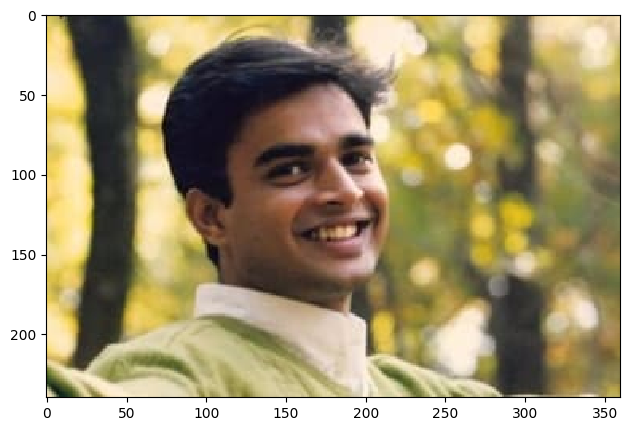

In [12]:
imshow(maddy_img[18])

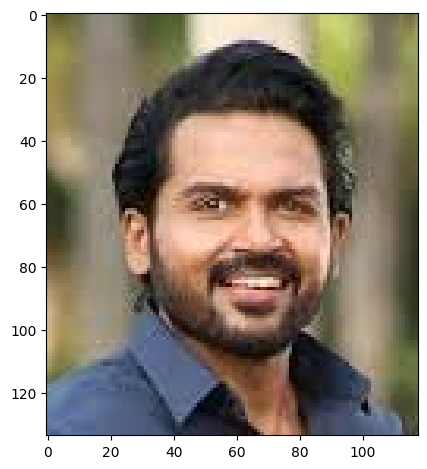

In [13]:
imshow(karthi_img[14])

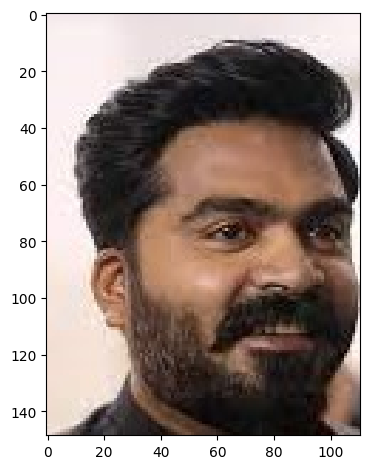

In [14]:
imshow(simbu_img[5])

In [15]:
maddy_gry=[None]*limit
j=0
for i in maddy:
    if(j<limit):
        maddy_gry[j]=rgb2gray(maddy_img[j])
        j+=1
    else:
        break

In [16]:
karthi_gry=[None]*limit
j=0
for i in karthi:
    if(j<limit):
        karthi_gry[j]=rgb2gray(karthi_img[j])
        j+=1
    else:
        break

In [17]:
simbu_gry=[None]*limit
j=0
for i in simbu:
    if(j<limit):
        simbu_gry[j]=rgb2gray(simbu_img[j])
        j+=1
    else:
        break

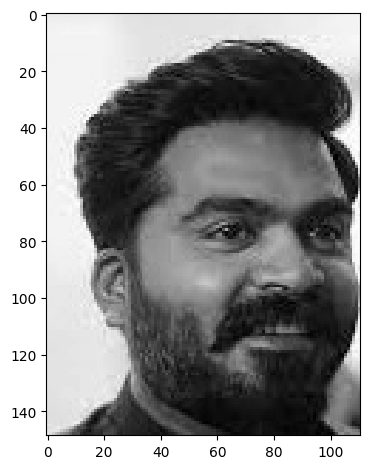

In [18]:
imshow(simbu_gry[5])

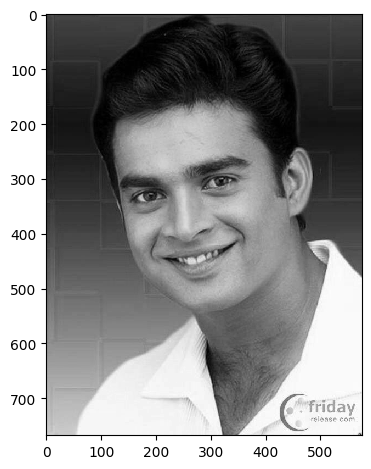

In [19]:
imshow(maddy_gry[5])

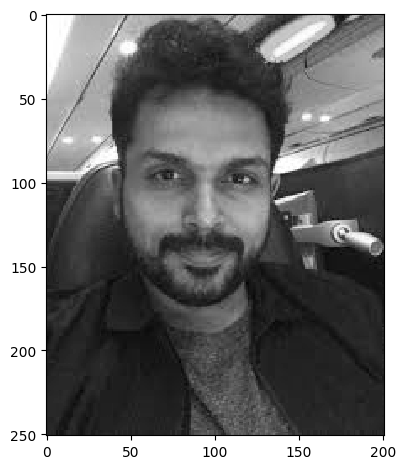

In [20]:
imshow(karthi_gry[12])

#  size

In [21]:
karthi_gry[2].shape

(81, 52)

In [22]:
karthi_gry[3].shape

(118, 104)

In [23]:
karthi_gry[6].shape

(87, 83)

In [24]:
maddy_gry[2].shape

(283, 215)

In [25]:
maddy_gry[8].shape

(600, 600)

In [26]:
for j in range(20):
    md=maddy_gry[j]
    maddy_gry[j]=resize(md,(512,512))

In [27]:
for j in range(20):
    kr=karthi_gry[j]
    karthi_gry[j]=resize(kr,(512,512))

In [28]:
for j in range(20):
    str =simbu_gry[j]
    simbu_gry[j]=resize(str,(512,512))

In [29]:
maddy_gry[8].shape

(512, 512)

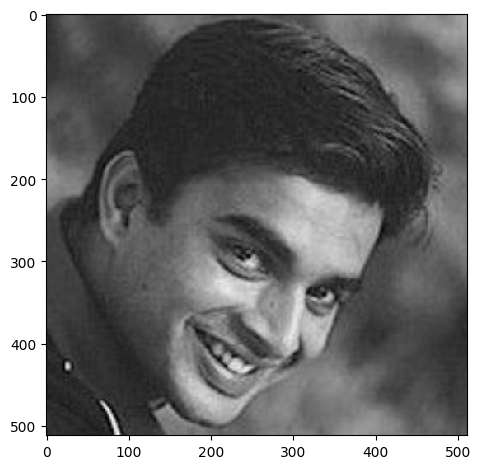

In [30]:
imshow(maddy_gry[12])

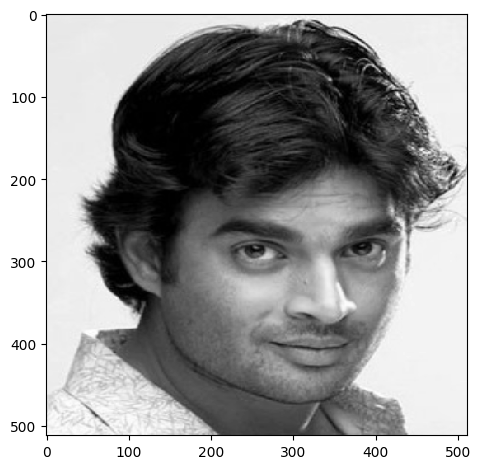

In [31]:
imshow(maddy_gry[6])

# find out  the number of gray scale images


In [32]:
len_of_images_maddy=len(maddy_gry)

In [33]:
len_of_images_maddy

20

#  create a variable image size

In [34]:
image_size_maddy=maddy_gry[1].shape

In [35]:
image_size_maddy

(512, 512)

#  create a variable flatten size maddy

In [36]:
flatten_size_maddy=image_size_maddy[0]*image_size_maddy[1]

In [37]:
flatten_size_maddy

262144

#   now flatten the image from (512,512) mstrix into 262144,1 vector

In [38]:
for i in range(len_of_images_maddy):
    maddy_gry[i]=np.ndarray.flatten(maddy_gry[i]).reshape(flatten_size_maddy,1)

#  now satck the individual image arraye elements into one array

In [39]:
maddy_gry=np.dstack(maddy_gry)

In [40]:
maddy_gry

array([[[0.71886555, 0.22964627, 0.51945305, ..., 0.21585137,
         0.71886555, 0.39659066]],

       [[0.72106594, 0.22964627, 0.52084964, ..., 0.21585137,
         0.72106594, 0.38507105]],

       [[0.72358436, 0.22964627, 0.51718786, ..., 0.21577295,
         0.72358436, 0.38471934]],

       ...,

       [[0.66452026, 0.10330784, 0.31999174, ..., 0.35655471,
         0.66452026, 0.49926931]],

       [[0.65568746, 0.10330784, 0.35019613, ..., 0.35329184,
         0.65568746, 0.51089875]],

       [[0.64913345, 0.10330784, 0.33867632, ..., 0.35329184,
         0.64913345, 0.5289484 ]]])

# now if we needed rollaxis

In [41]:
maddy_gry=np.rollaxis(maddy_gry,axis=2,start=0)

In [42]:
maddy_gry.shape

(20, 262144, 1)

In [43]:
maddy_gry=maddy_gry.reshape(len_of_images_maddy,flatten_size_maddy)

In [44]:
maddy_gry.shape

(20, 262144)

#  creating the dataframe of the image vectors

In [45]:
maddy_data=pd.DataFrame(maddy_gry)

In [46]:
maddy_data

,0,1,2,3,4,5,6,7,8,9,...,262134,262135,262136,262137,262138,262139,262140,262141,262142,262143
0,0.718866,0.721066,0.723584,0.723875,0.722011,0.716626,0.707609,0.693852,0.679368,0.665350,...,0.669924,0.674577,0.674288,0.667380,0.666121,0.666959,0.669016,0.664520,0.655687,0.649133
1,0.229646,0.229646,0.229646,0.229646,0.229646,0.229646,0.229646,0.229646,0.229646,0.229646,...,0.103308,0.103308,0.103338,0.109626,0.118088,0.108409,0.103332,0.103308,0.103308,0.103308
2,0.519453,0.520850,0.517188,0.513526,0.508678,0.503738,0.500597,0.498951,0.498120,0.501413,...,0.373314,0.351038,0.345063,0.342311,0.330677,0.308338,0.289787,0.319992,0.350196,0.338676
3,0.396591,0.385071,0.384719,0.432274,0.435700,0.420289,0.387569,0.397540,0.407821,0.413841,...,0.522621,0.557464,0.550498,0.512832,0.520584,0.532018,0.537543,0.499269,0.510899,0.528948
4,0.995236,0.995258,0.995202,0.995145,0.995192,0.995248,0.995246,0.995190,0.995192,0.995604,...,0.470826,0.475405,0.480818,0.486352,0.496613,0.511970,0.527563,0.545594,0.563624,0.556546
5,0.297558,0.305830,0.309507,0.305830,0.299765,0.303442,0.312265,0.326606,0.317782,0.304182,...,0.968033,0.949326,0.920629,0.747243,0.607836,0.593405,0.513720,0.291282,0.322343,0.643439
6,0.175447,0.175447,0.175447,0.175447,0.175447,0.175447,0.175452,0.175479,0.175495,0.175495,...,0.942568,0.942568,0.942343,0.941976,0.943667,0.945827,0.945827,0.945827,0.945827,0.945827
7,0.926897,0.926897,0.926897,0.926897,0.926897,0.926897,0.926897,0.927850,0.929569,0.930455,...,0.294142,0.308344,0.318481,0.326788,0.332817,0.336607,0.337781,0.345294,0.359764,0.359988
8,0.515435,0.515435,0.517120,0.519356,0.522390,0.523278,0.524197,0.531121,0.531121,0.533603,...,0.380072,0.475374,0.539082,0.406098,0.495632,0.479957,0.485667,0.589946,0.631203,0.626135
9,0.691375,0.685526,0.690436,0.696285,0.702134,0.707112,0.711814,0.716516,0.718968,0.719912,...,0.488283,0.491120,0.492818,0.492818,0.492818,0.492818,0.492818,0.492818,0.492818,0.492818


#  type the image dataframe name to look into  the dataframe

In [47]:
maddy_data["label"]="madhavan"

In [48]:
maddy_data

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,0.718866,0.721066,0.723584,0.723875,0.722011,0.716626,0.707609,0.693852,0.679368,0.665350,...,0.674577,0.674288,0.667380,0.666121,0.666959,0.669016,0.664520,0.655687,0.649133,madhavan
1,0.229646,0.229646,0.229646,0.229646,0.229646,0.229646,0.229646,0.229646,0.229646,0.229646,...,0.103308,0.103338,0.109626,0.118088,0.108409,0.103332,0.103308,0.103308,0.103308,madhavan
2,0.519453,0.520850,0.517188,0.513526,0.508678,0.503738,0.500597,0.498951,0.498120,0.501413,...,0.351038,0.345063,0.342311,0.330677,0.308338,0.289787,0.319992,0.350196,0.338676,madhavan
3,0.396591,0.385071,0.384719,0.432274,0.435700,0.420289,0.387569,0.397540,0.407821,0.413841,...,0.557464,0.550498,0.512832,0.520584,0.532018,0.537543,0.499269,0.510899,0.528948,madhavan
4,0.995236,0.995258,0.995202,0.995145,0.995192,0.995248,0.995246,0.995190,0.995192,0.995604,...,0.475405,0.480818,0.486352,0.496613,0.511970,0.527563,0.545594,0.563624,0.556546,madhavan
5,0.297558,0.305830,0.309507,0.305830,0.299765,0.303442,0.312265,0.326606,0.317782,0.304182,...,0.949326,0.920629,0.747243,0.607836,0.593405,0.513720,0.291282,0.322343,0.643439,madhavan
6,0.175447,0.175447,0.175447,0.175447,0.175447,0.175447,0.175452,0.175479,0.175495,0.175495,...,0.942568,0.942343,0.941976,0.943667,0.945827,0.945827,0.945827,0.945827,0.945827,madhavan
7,0.926897,0.926897,0.926897,0.926897,0.926897,0.926897,0.926897,0.927850,0.929569,0.930455,...,0.308344,0.318481,0.326788,0.332817,0.336607,0.337781,0.345294,0.359764,0.359988,madhavan
8,0.515435,0.515435,0.517120,0.519356,0.522390,0.523278,0.524197,0.531121,0.531121,0.533603,...,0.475374,0.539082,0.406098,0.495632,0.479957,0.485667,0.589946,0.631203,0.626135,madhavan
9,0.691375,0.685526,0.690436,0.696285,0.702134,0.707112,0.711814,0.716516,0.718968,0.719912,...,0.491120,0.492818,0.492818,0.492818,0.492818,0.492818,0.492818,0.492818,0.492818,madhavan


In [49]:
len_of_images_simbu=len(simbu_gry)

In [50]:
len_of_images_simbu

20

In [51]:
image_size_simbu=simbu_gry[1].shape

In [52]:
image_size_simbu

(512, 512)

In [53]:
flatten_size_simbu=image_size_simbu[0]*image_size_simbu[1]

In [54]:
flatten_size_simbu

262144

In [55]:
for i in range(len_of_images_simbu):
    simbu_gry[i]=np.ndarray.flatten(simbu_gry[i]).reshape(flatten_size_simbu,1)

In [56]:
simbu_gry=np.dstack(simbu_gry)

In [57]:
simbu_gry

array([[[0.01512078, 0.45433647, 0.55068655, ..., 0.15378312,
         0.25337193, 0.52313106]],

       [[0.01512078, 0.45433647, 0.56172589, ..., 0.15458647,
         0.25424509, 0.52386606]],

       [[0.01512078, 0.45433647, 0.57191605, ..., 0.15732519,
         0.25467401, 0.5235762 ]],

       ...,

       [[0.12470572, 0.1692724 , 0.84024941, ..., 0.11263137,
         0.27249421, 0.53538316]],

       [[0.1244655 , 0.16820588, 0.84024941, ..., 0.11263137,
         0.27084142, 0.53654259]],

       [[0.12481026, 0.16713935, 0.84024941, ..., 0.11263137,
         0.26747681, 0.53360261]]])

In [58]:
simbu_gry=np.rollaxis(simbu_gry,axis=2,start=0)

In [59]:
simbu_gry.shape

(20, 262144, 1)

In [60]:
simbu_gry=simbu_gry.reshape(len_of_images_simbu,flatten_size_simbu)

In [61]:
simbu_gry.shape

(20, 262144)

In [62]:
simbu_data=pd.DataFrame(simbu_gry)

In [63]:
simbu_data

,0,1,2,3,4,5,6,7,8,9,...,262134,262135,262136,262137,262138,262139,262140,262141,262142,262143
0,0.015121,0.015121,0.015121,0.015121,0.015121,0.015214,0.015385,0.015556,0.015973,0.017161,...,0.125623,0.125566,0.125552,0.125552,0.125552,0.125395,0.125050,0.124706,0.124466,0.124810
1,0.454336,0.454336,0.454336,0.454336,0.454336,0.454336,0.454336,0.454336,0.454336,0.454336,...,0.163218,0.164282,0.165349,0.166415,0.167482,0.168548,0.169615,0.169272,0.168206,0.167139
2,0.550687,0.561726,0.571916,0.560877,0.549837,0.538798,0.527759,0.518815,0.525943,0.533070,...,0.841097,0.840696,0.840296,0.840249,0.840249,0.840249,0.840249,0.840249,0.840249,0.840249
3,0.825502,0.825502,0.825502,0.825502,0.825502,0.825502,0.825502,0.825502,0.825502,0.825502,...,0.693092,0.696259,0.699425,0.648850,0.595821,0.542791,0.489762,0.436732,0.488217,0.541247
4,0.550546,0.550546,0.550546,0.550546,0.550546,0.550546,0.550546,0.550546,0.550480,0.550044,...,0.524076,0.523807,0.523538,0.523269,0.523000,0.522731,0.522462,0.522345,0.522614,0.522883
5,0.924856,0.924856,0.924856,0.924856,0.924856,0.924856,0.924856,0.924856,0.924856,0.924856,...,0.508855,0.505527,0.502198,0.498604,0.494642,0.490680,0.486717,0.482755,0.485182,0.489145
6,0.317241,0.319788,0.322334,0.324211,0.321664,0.319118,0.316571,0.314024,0.311478,0.308931,...,0.882414,0.881533,0.880653,0.879772,0.878891,0.878010,0.877129,0.877778,0.878659,0.879540
7,0.993326,0.994005,0.994093,0.993414,0.992734,0.992055,0.991624,0.991755,0.991886,0.992017,...,0.576083,0.564977,0.553870,0.542764,0.537289,0.534303,0.531316,0.528330,0.528716,0.531702
8,0.409205,0.408907,0.408609,0.408886,0.409184,0.409482,0.409779,0.410077,0.410108,0.410108,...,0.960006,0.962982,0.965028,0.959050,0.953072,0.947094,0.941116,0.935552,0.941530,0.947508
9,0.791092,0.791143,0.791094,0.791042,0.790991,0.791464,0.791977,0.792490,0.792587,0.792628,...,0.654341,0.652034,0.650002,0.650002,0.650002,0.650094,0.651380,0.652667,0.653893,0.652606


In [64]:
simbu_data["label"]="str"

In [65]:
simbu_data

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,0.015121,0.015121,0.015121,0.015121,0.015121,0.015214,0.015385,0.015556,0.015973,0.017161,...,0.125566,0.125552,0.125552,0.125552,0.125395,0.125050,0.124706,0.124466,0.124810,str
1,0.454336,0.454336,0.454336,0.454336,0.454336,0.454336,0.454336,0.454336,0.454336,0.454336,...,0.164282,0.165349,0.166415,0.167482,0.168548,0.169615,0.169272,0.168206,0.167139,str
2,0.550687,0.561726,0.571916,0.560877,0.549837,0.538798,0.527759,0.518815,0.525943,0.533070,...,0.840696,0.840296,0.840249,0.840249,0.840249,0.840249,0.840249,0.840249,0.840249,str
3,0.825502,0.825502,0.825502,0.825502,0.825502,0.825502,0.825502,0.825502,0.825502,0.825502,...,0.696259,0.699425,0.648850,0.595821,0.542791,0.489762,0.436732,0.488217,0.541247,str
4,0.550546,0.550546,0.550546,0.550546,0.550546,0.550546,0.550546,0.550546,0.550480,0.550044,...,0.523807,0.523538,0.523269,0.523000,0.522731,0.522462,0.522345,0.522614,0.522883,str
5,0.924856,0.924856,0.924856,0.924856,0.924856,0.924856,0.924856,0.924856,0.924856,0.924856,...,0.505527,0.502198,0.498604,0.494642,0.490680,0.486717,0.482755,0.485182,0.489145,str
6,0.317241,0.319788,0.322334,0.324211,0.321664,0.319118,0.316571,0.314024,0.311478,0.308931,...,0.881533,0.880653,0.879772,0.878891,0.878010,0.877129,0.877778,0.878659,0.879540,str
7,0.993326,0.994005,0.994093,0.993414,0.992734,0.992055,0.991624,0.991755,0.991886,0.992017,...,0.564977,0.553870,0.542764,0.537289,0.534303,0.531316,0.528330,0.528716,0.531702,str
8,0.409205,0.408907,0.408609,0.408886,0.409184,0.409482,0.409779,0.410077,0.410108,0.410108,...,0.962982,0.965028,0.959050,0.953072,0.947094,0.941116,0.935552,0.941530,0.947508,str
9,0.791092,0.791143,0.791094,0.791042,0.790991,0.791464,0.791977,0.792490,0.792587,0.792628,...,0.652034,0.650002,0.650002,0.650002,0.650094,0.651380,0.652667,0.653893,0.652606,str


In [66]:
len_of_images_karthi=len(karthi_gry)

In [67]:
len_of_images_karthi

20

In [68]:
image_size_karthi=karthi_gry[1].shape

In [69]:
image_size_karthi

(512, 512)

In [70]:
flatten_size_karthi=image_size_karthi[0]*image_size_karthi[1]

In [71]:
flatten_size_karthi

262144

In [72]:
for i in range(len_of_images_karthi):
    karthi_gry[i]=np.ndarray.flatten(karthi_gry[i]).reshape(flatten_size_karthi,1)

In [73]:
 karthi_gry=np.dstack( karthi_gry)

In [74]:
karthi_gry

array([[[0.54234875, 0.75790431, 0.81360792, ..., 0.0386502 ,
         0.44786609, 0.66345586]],

       [[0.55648995, 0.75790431, 0.81457213, ..., 0.0386502 ,
         0.4472588 , 0.65993007]],

       [[0.57063115, 0.75790431, 0.81553633, ..., 0.0386502 ,
         0.44711827, 0.65640427]],

       ...,

       [[0.06135809, 0.5391055 , 0.90788284, ..., 0.56598551,
         0.58117948, 0.79551846]],

       [[0.0622615 , 0.53096388, 0.90819094, ..., 0.5652734 ,
         0.57603117, 0.79582567]],

       [[0.06316491, 0.52282225, 0.90849905, ..., 0.56456128,
         0.55378309, 0.79613288]]])

In [75]:
karthi_gry=np.rollaxis(karthi_gry,axis=2,start=0)

In [76]:
karthi_gry.shape

(20, 262144, 1)

In [77]:
karthi_gry=karthi_gry.reshape(len_of_images_karthi,flatten_size_karthi)

In [78]:
karthi_gry.shape

(20, 262144)

In [79]:
karthi_data=pd.DataFrame(karthi_gry)

In [80]:
karthi_data

,0,1,2,3,4,5,6,7,8,9,...,262134,262135,262136,262137,262138,262139,262140,262141,262142,262143
0,0.542349,0.556490,0.570631,0.584772,0.581344,0.567203,0.553062,0.538921,0.524779,0.510638,...,0.065191,0.064287,0.063384,0.062481,0.061577,0.060674,0.060455,0.061358,0.062261,0.063165
1,0.757904,0.757904,0.757904,0.757904,0.757904,0.757904,0.757904,0.757904,0.757904,0.757904,...,0.497737,0.505879,0.514020,0.522162,0.530304,0.538445,0.546587,0.539106,0.530964,0.522822
2,0.813608,0.814572,0.815536,0.816501,0.817465,0.817316,0.816352,0.815388,0.814424,0.813460,...,0.908546,0.908238,0.907930,0.907622,0.907314,0.907267,0.907575,0.907883,0.908191,0.908499
3,0.699849,0.699849,0.699849,0.699849,0.699849,0.699849,0.699849,0.699630,0.697730,0.695830,...,0.291668,0.302513,0.313359,0.320247,0.326620,0.332992,0.339365,0.345737,0.339855,0.333482
4,0.899959,0.901008,0.900733,0.899683,0.898634,0.897585,0.898412,0.899461,0.900511,0.901725,...,0.847169,0.846652,0.846258,0.845865,0.845735,0.847834,0.849932,0.852031,0.852582,0.850484
5,0.575582,0.583094,0.588658,0.581147,0.573635,0.566123,0.558611,0.538587,0.498901,0.459215,...,0.432410,0.425496,0.418581,0.401734,0.378566,0.355398,0.332230,0.309062,0.326224,0.349391
6,0.601281,0.595970,0.590658,0.589762,0.595074,0.600385,0.605697,0.611008,0.616319,0.620903,...,0.525951,0.522029,0.518106,0.514184,0.510261,0.506339,0.502417,0.503078,0.507001,0.510923
7,0.954287,0.954287,0.954287,0.954287,0.954287,0.954287,0.954287,0.954287,0.954287,0.954287,...,0.928244,0.931854,0.935465,0.939075,0.942686,0.946297,0.949506,0.945895,0.942285,0.938674
8,0.398361,0.400610,0.408275,0.410895,0.404258,0.368265,0.373620,0.416136,0.507945,0.602328,...,0.333389,0.335378,0.331497,0.299547,0.271844,0.248866,0.219091,0.188185,0.171994,0.167245
9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.416723,0.417497,0.418270,0.419044,0.419817,0.420591,0.421365,0.422085,0.421311,0.420537


In [81]:
karthi_data["label"]="karthi"

In [82]:
karthi_data

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,0.542349,0.556490,0.570631,0.584772,0.581344,0.567203,0.553062,0.538921,0.524779,0.510638,...,0.064287,0.063384,0.062481,0.061577,0.060674,0.060455,0.061358,0.062261,0.063165,karthi
1,0.757904,0.757904,0.757904,0.757904,0.757904,0.757904,0.757904,0.757904,0.757904,0.757904,...,0.505879,0.514020,0.522162,0.530304,0.538445,0.546587,0.539106,0.530964,0.522822,karthi
2,0.813608,0.814572,0.815536,0.816501,0.817465,0.817316,0.816352,0.815388,0.814424,0.813460,...,0.908238,0.907930,0.907622,0.907314,0.907267,0.907575,0.907883,0.908191,0.908499,karthi
3,0.699849,0.699849,0.699849,0.699849,0.699849,0.699849,0.699849,0.699630,0.697730,0.695830,...,0.302513,0.313359,0.320247,0.326620,0.332992,0.339365,0.345737,0.339855,0.333482,karthi
4,0.899959,0.901008,0.900733,0.899683,0.898634,0.897585,0.898412,0.899461,0.900511,0.901725,...,0.846652,0.846258,0.845865,0.845735,0.847834,0.849932,0.852031,0.852582,0.850484,karthi
5,0.575582,0.583094,0.588658,0.581147,0.573635,0.566123,0.558611,0.538587,0.498901,0.459215,...,0.425496,0.418581,0.401734,0.378566,0.355398,0.332230,0.309062,0.326224,0.349391,karthi
6,0.601281,0.595970,0.590658,0.589762,0.595074,0.600385,0.605697,0.611008,0.616319,0.620903,...,0.522029,0.518106,0.514184,0.510261,0.506339,0.502417,0.503078,0.507001,0.510923,karthi
7,0.954287,0.954287,0.954287,0.954287,0.954287,0.954287,0.954287,0.954287,0.954287,0.954287,...,0.931854,0.935465,0.939075,0.942686,0.946297,0.949506,0.945895,0.942285,0.938674,karthi
8,0.398361,0.400610,0.408275,0.410895,0.404258,0.368265,0.373620,0.416136,0.507945,0.602328,...,0.335378,0.331497,0.299547,0.271844,0.248866,0.219091,0.188185,0.171994,0.167245,karthi
9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.417497,0.418270,0.419044,0.419817,0.420591,0.421365,0.422085,0.421311,0.420537,karthi


# image matrix to convention

# combining three dataframe into one dataframe

In [84]:
actor_1=pd.concat([maddy_data,simbu_data])

In [85]:
actor=pd.concat([actor_1,karthi_data])

In [86]:
actor

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,0.718866,0.721066,0.723584,0.723875,0.722011,0.716626,0.707609,0.693852,0.679368,0.665350,...,0.674577,0.674288,0.667380,0.666121,0.666959,0.669016,0.664520,0.655687,0.649133,madhavan
1,0.229646,0.229646,0.229646,0.229646,0.229646,0.229646,0.229646,0.229646,0.229646,0.229646,...,0.103308,0.103338,0.109626,0.118088,0.108409,0.103332,0.103308,0.103308,0.103308,madhavan
2,0.519453,0.520850,0.517188,0.513526,0.508678,0.503738,0.500597,0.498951,0.498120,0.501413,...,0.351038,0.345063,0.342311,0.330677,0.308338,0.289787,0.319992,0.350196,0.338676,madhavan
3,0.396591,0.385071,0.384719,0.432274,0.435700,0.420289,0.387569,0.397540,0.407821,0.413841,...,0.557464,0.550498,0.512832,0.520584,0.532018,0.537543,0.499269,0.510899,0.528948,madhavan
4,0.995236,0.995258,0.995202,0.995145,0.995192,0.995248,0.995246,0.995190,0.995192,0.995604,...,0.475405,0.480818,0.486352,0.496613,0.511970,0.527563,0.545594,0.563624,0.556546,madhavan
5,0.297558,0.305830,0.309507,0.305830,0.299765,0.303442,0.312265,0.326606,0.317782,0.304182,...,0.949326,0.920629,0.747243,0.607836,0.593405,0.513720,0.291282,0.322343,0.643439,madhavan
6,0.175447,0.175447,0.175447,0.175447,0.175447,0.175447,0.175452,0.175479,0.175495,0.175495,...,0.942568,0.942343,0.941976,0.943667,0.945827,0.945827,0.945827,0.945827,0.945827,madhavan
7,0.926897,0.926897,0.926897,0.926897,0.926897,0.926897,0.926897,0.927850,0.929569,0.930455,...,0.308344,0.318481,0.326788,0.332817,0.336607,0.337781,0.345294,0.359764,0.359988,madhavan
8,0.515435,0.515435,0.517120,0.519356,0.522390,0.523278,0.524197,0.531121,0.531121,0.533603,...,0.475374,0.539082,0.406098,0.495632,0.479957,0.485667,0.589946,0.631203,0.626135,madhavan
9,0.691375,0.685526,0.690436,0.696285,0.702134,0.707112,0.711814,0.716516,0.718968,0.719912,...,0.491120,0.492818,0.492818,0.492818,0.492818,0.492818,0.492818,0.492818,0.492818,madhavan


In [133]:
from sklearn.utils import shuffle


In [134]:
kolly_indexed=shuffle(actor).reset_index()

In [135]:
kolly_indexed

,index,0,1,2,3,4,5,6,7,8,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,12,0.217051,0.217477,0.216716,0.215954,0.218328,0.222316,0.226707,0.234733,0.242758,...,0.331393,0.340584,0.349775,0.349887,0.348991,0.345948,0.338741,0.331533,0.335569,madhavan
1,7,0.993326,0.994005,0.994093,0.993414,0.992734,0.992055,0.991624,0.991755,0.991886,...,0.564977,0.553870,0.542764,0.537289,0.534303,0.531316,0.528330,0.528716,0.531702,str
2,15,0.991889,0.991889,0.991889,0.991889,0.991889,0.991889,0.991889,0.991889,0.991889,...,0.370620,0.359033,0.395524,0.432016,0.468507,0.504998,0.529325,0.492834,0.456343,str
3,16,0.216607,0.216607,0.216607,0.216607,0.216607,0.216607,0.216607,0.216607,0.216933,...,0.950390,0.952114,0.953837,0.955235,0.955235,0.955235,0.952528,0.949564,0.950381,karthi
4,3,0.699849,0.699849,0.699849,0.699849,0.699849,0.699849,0.699849,0.699630,0.697730,...,0.302513,0.313359,0.320247,0.326620,0.332992,0.339365,0.345737,0.339855,0.333482,karthi
5,5,0.297558,0.305830,0.309507,0.305830,0.299765,0.303442,0.312265,0.326606,0.317782,...,0.949326,0.920629,0.747243,0.607836,0.593405,0.513720,0.291282,0.322343,0.643439,madhavan
6,5,0.924856,0.924856,0.924856,0.924856,0.924856,0.924856,0.924856,0.924856,0.924856,...,0.505527,0.502198,0.498604,0.494642,0.490680,0.486717,0.482755,0.485182,0.489145,str
7,0,0.015121,0.015121,0.015121,0.015121,0.015121,0.015214,0.015385,0.015556,0.015973,...,0.125566,0.125552,0.125552,0.125552,0.125395,0.125050,0.124706,0.124466,0.124810,str
8,0,0.718866,0.721066,0.723584,0.723875,0.722011,0.716626,0.707609,0.693852,0.679368,...,0.674577,0.674288,0.667380,0.666121,0.666959,0.669016,0.664520,0.655687,0.649133,madhavan
9,10,0.578162,0.578536,0.578360,0.577986,0.577612,0.577314,0.577314,0.577314,0.577314,...,0.779532,0.779532,0.779532,0.779532,0.779151,0.778673,0.778194,0.777970,0.778448,str


In [136]:
kolly_actors=kolly_indexed.drop(['index'],axis=1)

In [137]:
kolly_actors

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,0.217051,0.217477,0.216716,0.215954,0.218328,0.222316,0.226707,0.234733,0.242758,0.248961,...,0.331393,0.340584,0.349775,0.349887,0.348991,0.345948,0.338741,0.331533,0.335569,madhavan
1,0.993326,0.994005,0.994093,0.993414,0.992734,0.992055,0.991624,0.991755,0.991886,0.992017,...,0.564977,0.553870,0.542764,0.537289,0.534303,0.531316,0.528330,0.528716,0.531702,str
2,0.991889,0.991889,0.991889,0.991889,0.991889,0.991889,0.991889,0.991889,0.991889,0.991889,...,0.370620,0.359033,0.395524,0.432016,0.468507,0.504998,0.529325,0.492834,0.456343,str
3,0.216607,0.216607,0.216607,0.216607,0.216607,0.216607,0.216607,0.216607,0.216933,0.217541,...,0.950390,0.952114,0.953837,0.955235,0.955235,0.955235,0.952528,0.949564,0.950381,karthi
4,0.699849,0.699849,0.699849,0.699849,0.699849,0.699849,0.699849,0.699630,0.697730,0.695830,...,0.302513,0.313359,0.320247,0.326620,0.332992,0.339365,0.345737,0.339855,0.333482,karthi
5,0.297558,0.305830,0.309507,0.305830,0.299765,0.303442,0.312265,0.326606,0.317782,0.304182,...,0.949326,0.920629,0.747243,0.607836,0.593405,0.513720,0.291282,0.322343,0.643439,madhavan
6,0.924856,0.924856,0.924856,0.924856,0.924856,0.924856,0.924856,0.924856,0.924856,0.924856,...,0.505527,0.502198,0.498604,0.494642,0.490680,0.486717,0.482755,0.485182,0.489145,str
7,0.015121,0.015121,0.015121,0.015121,0.015121,0.015214,0.015385,0.015556,0.015973,0.017161,...,0.125566,0.125552,0.125552,0.125552,0.125395,0.125050,0.124706,0.124466,0.124810,str
8,0.718866,0.721066,0.723584,0.723875,0.722011,0.716626,0.707609,0.693852,0.679368,0.665350,...,0.674577,0.674288,0.667380,0.666121,0.666959,0.669016,0.664520,0.655687,0.649133,madhavan
9,0.578162,0.578536,0.578360,0.577986,0.577612,0.577314,0.577314,0.577314,0.577314,0.577566,...,0.779532,0.779532,0.779532,0.779532,0.779151,0.778673,0.778194,0.777970,0.778448,str


In [138]:
kolly_actors.to_csv("actors.csv")

PermissionError: [Errno 13] Permission denied: 'actors.csv'

# assigning dependant and independant variables

In [ ]:
x=kolly_actors.values[:,:-1]

In [ ]:
y=kolly_actors.values[:,-1]

In [ ]:
x

In [ ]:
y

#  assigning training and testing dataset

In [ ]:
from sklearn.model_selection import train_test_split

In [139]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [140]:
x_train.shape

(48, 262144)

In [141]:
x_test.shape

(12, 262144)

# principle compound analysis(pca)

In [142]:
from sklearn import decomposition

# compnent assignment for pca 

In [143]:
pca=decomposition.PCA(n_components=20,whiten=True,random_state=1)

# fitting th training set to generate principle components

In [144]:
pca.fit(x_train)

PCA(n_components=20, random_state=1, whiten=True)

#  transforming principle components

In [145]:
x_train_pca=pca.transform(x_train)

In [146]:
x_test_pca=pca.transform(x_test)

In [147]:
x_train_pca.shape

(48, 20)

In [148]:
x_test_pca.shape

(12, 20)

#  viewing the principle components or eigen

In [149]:
eigen=(np.reshape(x[10],(512,512)).astype(np.float64))

In [150]:
eigen

array([[0.14193451, 0.14193451, 0.14193451, ..., 0.13801294, 0.13801294,
        0.13801294],
       [0.14193451, 0.14193451, 0.14193451, ..., 0.13801294, 0.13801294,
        0.13801294],
       [0.14193451, 0.14193451, 0.14193451, ..., 0.13801294, 0.13801294,
        0.13801294],
       ...,
       [0.78793753, 0.78693416, 0.78702607, ..., 0.97754902, 0.97754902,
        0.97754902],
       [0.78793753, 0.78693416, 0.78702607, ..., 0.97754902, 0.97754902,
        0.97754902],
       [0.78793753, 0.78693416, 0.78702607, ..., 0.97754902, 0.97754902,
        0.97754902]])

# plotting images one by one as subplots

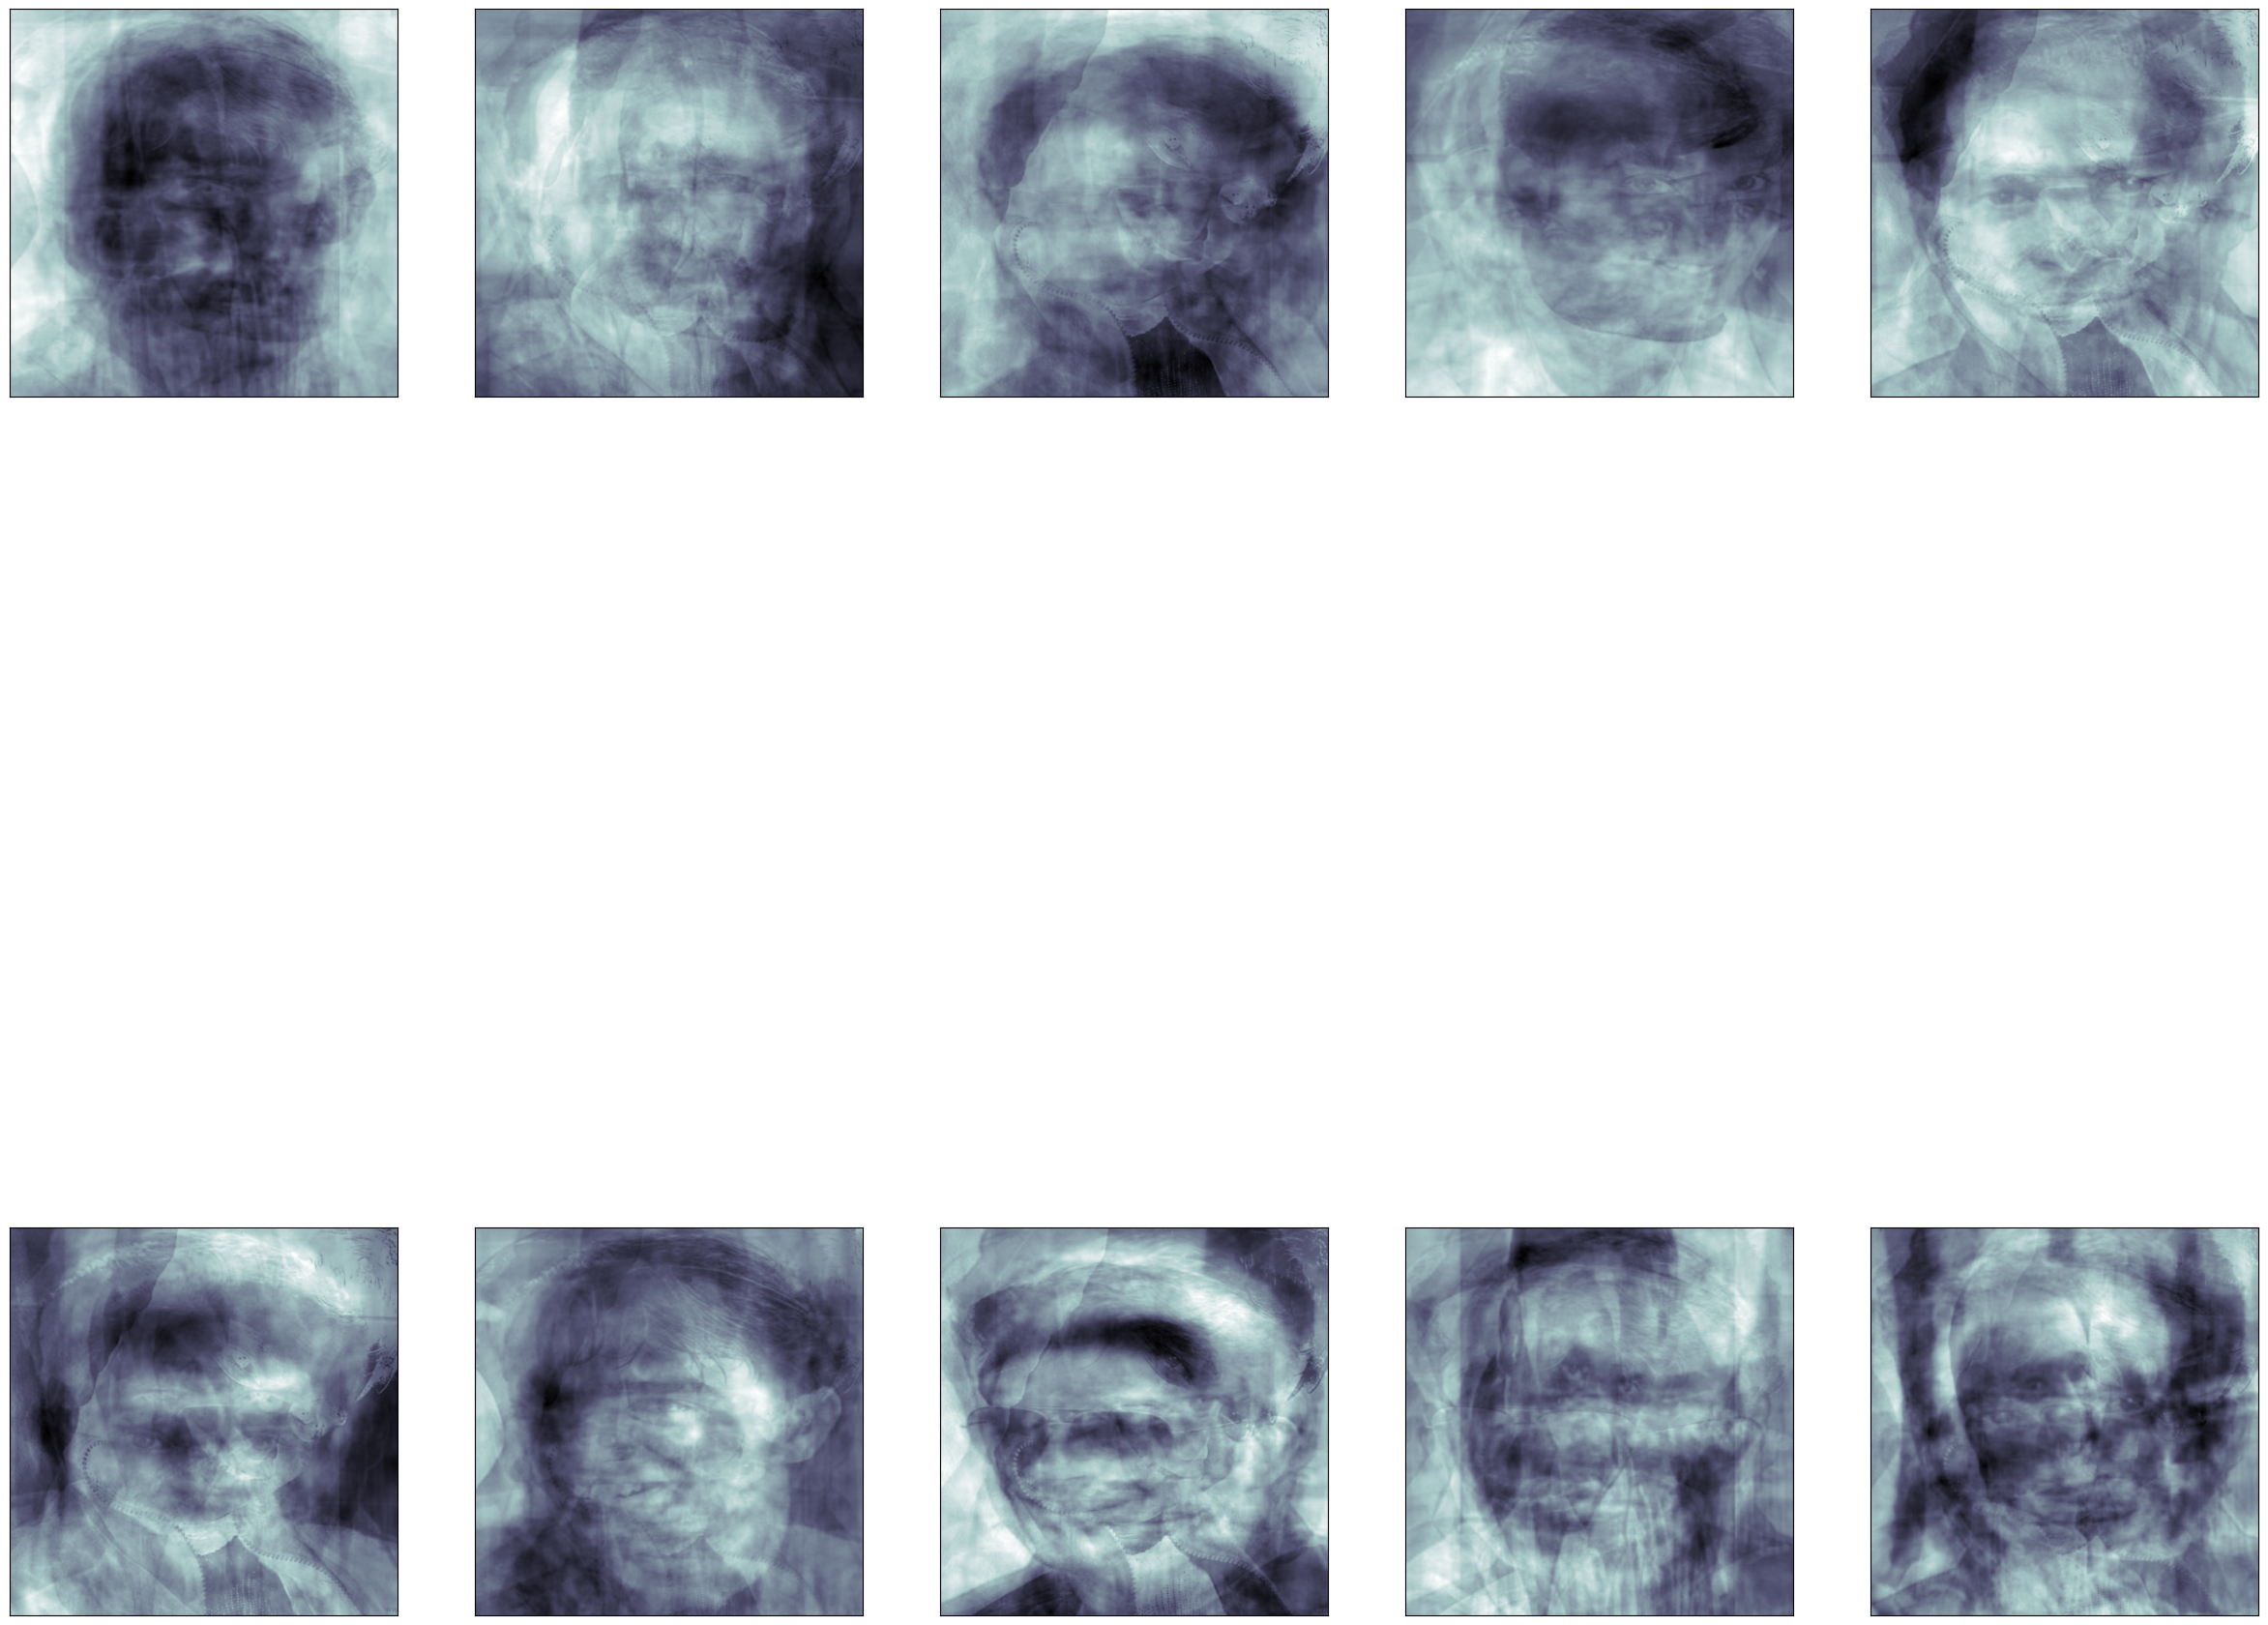

In [151]:
fig=plt.figure(figsize=(30,30))
for i in range(10):
    ax=fig.add_subplot(2,5,i+1,xticks=[],yticks=[])
    ax.imshow(pca.components_[i].reshape(eigen.shape),cmap=plt.cm.bone)

In [152]:
from sklearn import svm

In [153]:
clf=svm.SVC(C=2,gamma=0.006,kernel='rbf')
clf.fit(x_train_pca,y_train)

SVC(C=2, gamma=0.006)

# image prediction 

In [154]:
y_pred=clf.predict(x_test_pca)

In [155]:
y_pred

array(['str', 'str', 'str', 'str', 'str', 'str', 'karthi', 'str', 'str',
       'str', 'str', 'str'], dtype=object)

# prediction visualization

In [156]:
for i in range(np.random.randint(0,6,6)):
    predicted_image=(np.reshape(x_test[i],(512,512)).astype(np.float64))
    plt.title('predicted label: {0}'.format(y_pred[i]))
    plt.imshow(predicted_image,interpolation='nearest',cmap='gray')
    plt.show()

TypeError: only integer scalar arrays can be converted to a scalar index

In [157]:
from sklearn import metrics

In [158]:
accuracy=metrics.accuracy_score(y_test,y_pred)
accuracy

0.16666666666666666